In [1]:
from sympy import *
from IPython.display import display
%matplotlib inline
init_printing(use_latex=True)

# Rayleigh Quotient MarkII

We want to mix the last two functions we saw in the exercise, the shape associated with a load applied to the tip and the shape associated with a uniform distributed load.

We start by defining a number of variables that point to `Symbol` objects,

In [2]:
z, h , r0, dr, t, E, rho, zeta = symbols('z H r_0 Delta t E rho zeta')

We define the tip-load function starting from the expression of the bending moment, just a linear function that is 0 for $z=H$... we integrate two times and we get the displacements bar the constants of integration that, on the other hand, happen to be both equal to zero due to clamped end at $z=0$, implying that $\psi_1(0)=0$ and $\psi'_1(0)=0$

In [3]:
f12 = h-z
f11 = integrate(f12,z)
f10 = integrate(f11,z)

We have no scaling in place... we have to scale correctly our function by evaluating it for $z=H$ 

In [4]:
scale_factor = f10.subs(z,h)

Dividing our shape function (and its derivatives) by this particular scale factor we have, of course, an unit value of the tip displacement.

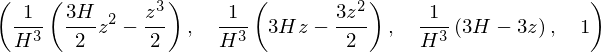

In [5]:
f10 /= scale_factor
f11 /= scale_factor
f12 /= scale_factor
f10, f11, f12, f10.subs(z,h)

We repeat the same procedure to compute the shape function for a constant distributed load, here the constraint on the bending moment is that both the moment and the shear are zero for $z=H$, so the non-normalized expression for $M_b\propto \psi_2''$ is

In [6]:
f22 = h*h/2 - h*z + z*z/2

The rest of the derivation is the same

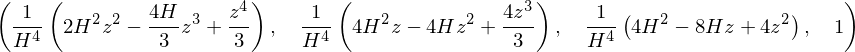

In [7]:
f21 = integrate(f22,z)
f20 = integrate(f21,z)
scale_factor = f20.subs(z,h)
f20 /= scale_factor
f21 /= scale_factor
f22 /= scale_factor
f20, f21, f22, f20.subs(z,h)

To combine the two shapes in the _right_ way we write

$$\psi = \alpha\,\psi_1+(1-\alpha)\,\psi_2$$

so that $\psi(H)=1$, note that the shape function depends on one parameter, $\alpha$, and we can minimize the Rayleigh Quotient with respect to $\alpha$.

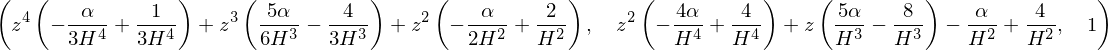

In [8]:
a = symbols('alpha')
f0 = a*f10 + (1-a)*f20
f2 = diff(f0,z,2)
f0.expand().collect(z), f2.expand().collect(z), f0.subs(z,h)

Working with symbols we don't need to formally define a Python function, it suffices to bind a name to a symbolic expression.  That's done for the different variable quantities that model our problem and using these named expressions we can compute the denominator and the numerator of the Rayleigh Quotient.

In [9]:
re = r0 - dr * z/h
ri = re - t
A = pi*(re**2-ri**2)
J = pi*(re**4-ri**4)/4
fm = rho*A*f0**2
fs = E*J*f2**2
mstar = 80000+integrate(fm,(z,0,h))
kstar = integrate(fs,(z,0,h))

Our problem is characterized by a set of numerical values for the different basic variables:

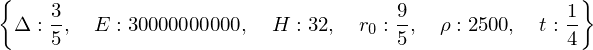

In [10]:
values = {E:30000000000,
          h:32,
          rho:2500,
          t:Rational(1,4),
          r0:Rational(18,10),
          dr:Rational(6,10)}

values

We can substitute these values in the numerator and denominator of the RQ

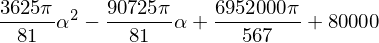

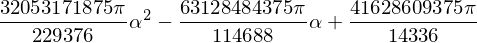

In [11]:
display(mstar.subs(values))
display(kstar.subs(values))

Let's look at the RQ as a function of $\alpha$, with successive refinements

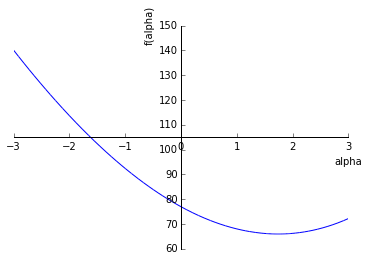

In [12]:
rq = (kstar/mstar).subs(values)
plot(rq, (a,-3,3));

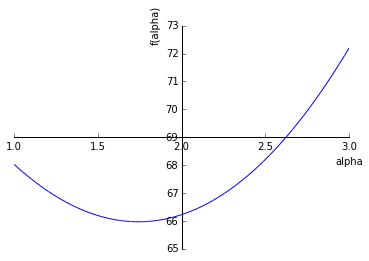

In [13]:
plot(rq, (a,1,3));

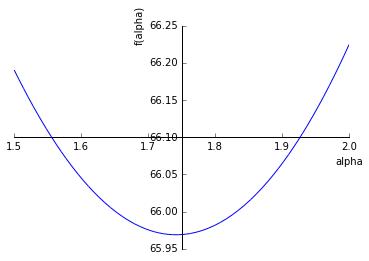

In [14]:
plot(rq, (a,1.5,2.0));

Here we do the following:

   1. Derive the RQ and obtain a numerical function (rather than a symbolic expression) using the `lambdify` function.
   2. Using a root finder function (here `bisect` from the `scipy.optimize` collection) we find the location of the minimum of RQ.
   3. Display the location of the minimum.
   4. Display the shape function as a function of $\zeta=z/H$.
   5. Display the minimum value of RQ.
   
Note that the eigenvalue we have previously found, for $\psi\propto1-\cos\zeta\pi/2$ was $\omega^2= 66.259\,(\text{rad/s})^2$ 

In [15]:
rqdiff = lambdify(a, rq.diff(a))
from scipy.optimize import bisect
a_0 = bisect(rqdiff, 1.6, 1.9)
display(a_0)
display(f0.expand().subs(a,a_0).subs(z,zeta*h))
rq.subs(a,a_0).evalf()

Oh, we have (re)discovered the Ritz method! and we have the better solution so far...

In [16]:
# usual incantation
from IPython.display import HTML
HTML(open('00_custom.css').read())